<h1><center> Flight Delay Analysis <center></h1>

In [1]:
# importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the csv format dataset 
data = pd.read_csv("M1_final.csv")
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
# Shape of the dataset
print("Total no. of rows:",data.shape[0])
print("Total no. of columns:",data.shape[1])

Total no. of rows: 28820
Total no. of columns: 23


In [4]:
#Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [5]:
#Finding the features with missing values
for feature in data.columns:
    if data[feature].isnull().sum() > 0 :
        print("The feature \"",feature,"\" has",data[feature].isnull().sum(),"missing values.")
        print("The feature \"",feature,"\" has",data[feature].isnull().sum()/len(data)*100,"% of missing values.")

The feature " Wind " has 2 missing values.
The feature " Wind " has 0.006939625260235948 % of missing values.


#### <span style="color:purple">**Only one feature has missing values which is <u>0.007%</u> of the entire data so we can drop those rows.**</span>


In [6]:
#removing rows with missing values
data.dropna(how="any",inplace=True)


In [7]:
print("After removing rows with missing values now the total number of rows changed from 28820 to",data.shape[0])

After removing rows with missing values now the total number of rows changed from 28820 to 28818


#### Finding number of categorical and numerical features

In [8]:
#ANSI escape codes for formatting
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    RED = '\033[91m'
    GREEN = '\033[92m'


In [9]:
categorical_features = []
numerical_features = []
for feature in data.columns:
    if data[feature].dtypes == "O":
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)
(print("There are",color.BOLD + color.UNDERLINE + str(len(categorical_features)) + color.END,"categorical features and",
       color.BOLD + color.UNDERLINE + str(len(numerical_features))+ color.END,"numerical_features."))

There are 6 categorical features and 17 numerical_features.


In [10]:
for feature in categorical_features:
    print(color.BOLD+feature+color.END,"-", data[feature].unique())

OP_UNIQUE_CARRIER - ['B6' 'DL' 'AA' 'AS' 'MQ' '9E' 'YX' 'HA' 'OO']
TAIL_NUM - ['N828JB' 'N992JB' 'N959JB' ... 'N316NB' 'N976NN' 'N217JQ']
DEST - ['CHS' 'LAX' 'FLL' 'MCO' 'ATL' 'ORD' 'BUF' 'LGB' 'LAS' 'DCA' 'PHX' 'SFO'
 'SJU' 'SLC' 'BOS' 'SAV' 'SYR' 'MSP' 'SEA' 'MIA' 'PDX' 'TPA' 'BTV' 'IAH'
 'DEN' 'RSW' 'ORF' 'JAX' 'MSY' 'CLT' 'BNA' 'RDU' 'SAN' 'SJC' 'ROC' 'DFW'
 'IAD' 'AUS' 'DTW' 'PWM' 'SRQ' 'CMH' 'HNL' 'PBI' 'BWI' 'CLE' 'BUR' 'PIT'
 'RIC' 'IND' 'CVG' 'SMF' 'ONT' 'SAT' 'PSP' 'OAK' 'ABQ' 'PSE' 'ORH' 'BQN'
 'STT' 'RNO' 'PHL' 'EGE' 'JAC']
Dew Point - ['34' '32' '33' '31' '30' '29' '67' '35' '36' '38' '39' '40' '41' '42'
 '28' '27' '46' '37' '44' '45' '52' '53' '54' '56' '57' '59' '58' '50'
 '43' '48' '49' '47' '21' '20' '22' '24' '23' '19' '18' '16' '13' '12'
 '14' '15' '17' '26' '25' '51' '55' '6\xa0' '9\xa0' '5\xa0' '8\xa0' '10'
 '4\xa0' '7\xa0' '3\xa0' '2\xa0' '11' '0\xa0' '-1' '1\xa0' '-2' '-3']
Wind - ['W' 'WNW' 'NW' 'NNW' 'S' 'ENE' 'NE' 'NNE' 'E' 'SE' 'CALM' 'SW' 'VAR'
 'SSE' 'SSW' 

In [11]:
# Convert to integers
data['Dew Point']= [int(value) for value in data['Dew Point']]

In [12]:
data['Dew Point'].unique()

array([34, 32, 33, 31, 30, 29, 67, 35, 36, 38, 39, 40, 41, 42, 28, 27, 46,
       37, 44, 45, 52, 53, 54, 56, 57, 59, 58, 50, 43, 48, 49, 47, 21, 20,
       22, 24, 23, 19, 18, 16, 13, 12, 14, 15, 17, 26, 25, 51, 55,  6,  9,
        5,  8, 10,  4,  7,  3,  2, 11,  0, -1,  1, -2, -3], dtype=int64)

In [13]:
data.drop('TAIL_NUM',axis=1,inplace=True)

### The number of numerical and categorical features.

In [14]:
categorical_features_new = []
numerical_features_new = []
for feature in data.columns:
    if data[feature].dtypes == "O":
        categorical_features_new.append(feature)
    else:
        numerical_features_new.append(feature)
(print("There are",color.BOLD + color.UNDERLINE + str(len(categorical_features_new)) + color.END,"categorical features and",
       color.BOLD + color.UNDERLINE + str(len(numerical_features_new))+ color.END,"numerical_features now."))

There are 4 categorical features and 18 numerical_features now.


In [15]:
delay_points = []
for element in data['DEP_DELAY']:
    if element > 15:
        delay_points.append(1)
    else:
        delay_points.append(0)
data['DELAY'] = delay_points

In [16]:
data['DELAY'].head()

0    0
1    0
2    1
3    0
4    0
Name: DELAY, dtype: int64

In [17]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DELAY
0,11,1,5,B6,CHS,-1,124,636,324,323,...,58,W,25,38,29.86,Fair / Windy,9,17,14,0
1,11,1,5,B6,LAX,-7,371,2475,340,333,...,58,W,25,38,29.86,Fair / Windy,9,17,15,0
2,11,1,5,B6,FLL,40,181,1069,301,341,...,58,W,25,38,29.86,Fair / Windy,9,17,22,1
3,11,1,5,B6,MCO,-2,168,944,345,343,...,58,W,25,38,29.86,Fair / Windy,9,17,12,0
4,11,1,5,DL,ATL,-4,139,760,360,356,...,58,W,24,35,29.91,Fair / Windy,9,17,13,0


#### Proportion of the target variable

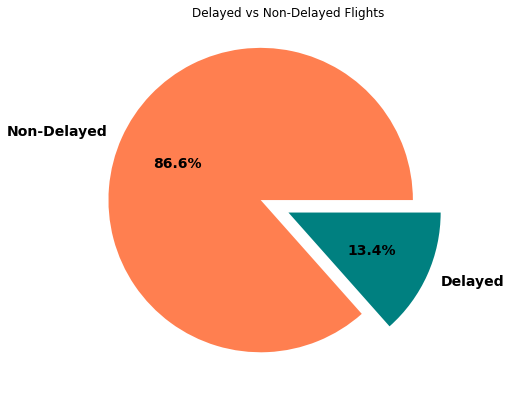

In [18]:
# Data for the pie chart
#Proportion of 0 and 1 in target column
plt.figure(figsize=(7,7))
y_counts = data["DELAY"].value_counts()
labels = ["Non-Delayed", "Delayed"]
sizes = y_counts.values
colors = ["coral","#008080"]
#colors = ['#ff00ff', '#ffcc00', '#00ff00', '#00ffff']
# plt.pie(sizes,labels=labels,colors=colors,explode=(0.2,0),autopct='%1.1f%%');
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0,
        textprops={'fontsize': 14, 'fontweight': 'bold'},explode=(0.2,0)) 
plt.title('Delayed vs Non-Delayed Flights');

#### Observation
- The dataset is imbalanced as the target variable classes are not distributed in equal proportions.

#### EDA

In [19]:
data.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST',
       'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M',
       'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity', 'Wind',
       'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT', 'DELAY'],
      dtype='object')

In [20]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() * 1.02
            ax.annotate(percentage, (x, y), size = 12)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y), size = 12)



C:\Users\LENOVO\AppData\Local\Temp/ipykernel_17000/2279713378.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([months[int(tick.get_text())] for tick in ax.get_xticklabels()])


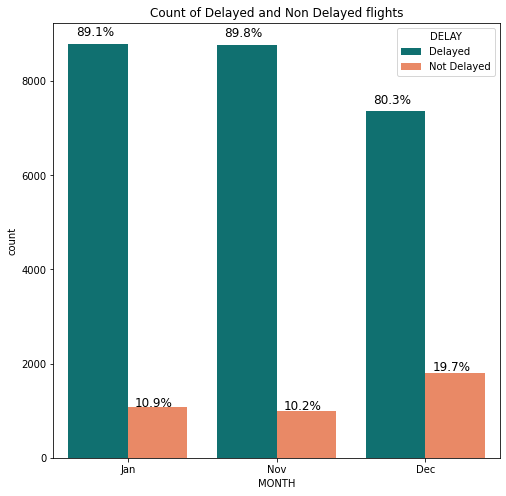

In [21]:
# ax = sns.countplot(x='MONTH',hue='DELAY',data=data)
# Define hexadecimal color codes for purple and maroon
plt.figure(figsize=(8,8))
teal_color = '#008080'
coral_color = '#FF7F50'
ax = sns.countplot(x='MONTH', hue='DELAY', data=data, palette={0: teal_color, 1: coral_color})
ax.set_title('Count of Delayed and Non Delayed flights')
ax.legend(title='DELAY', labels=['Delayed', 'Not Delayed'])
# Relabel x-axis ticks
months = {1: 'Jan', 11: 'Nov', 12: 'Dec'}
# Set x-axis ticks and labels
ax.set_xticklabels([months[int(tick.get_text())] for tick in ax.get_xticklabels()])
with_hue(ax,data.MONTH,3,2)
plt.show()

#### Observation
- December has the highest number of delayed flights.

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_17000/1022972050.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=data, x='Temperature', hue='DELAY', kde=True, bins=20, palette=colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


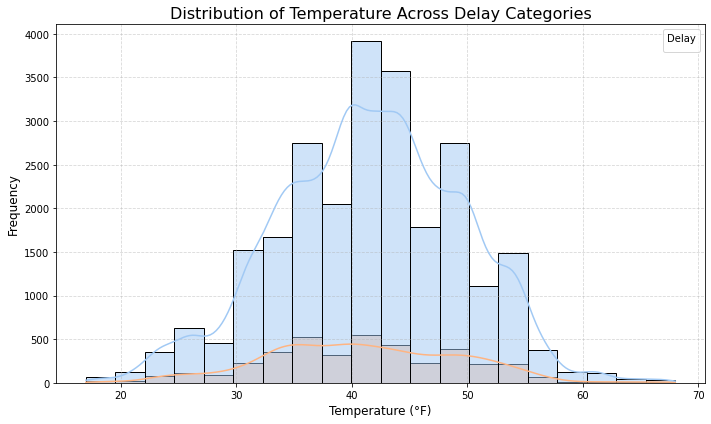

In [22]:
# Set a color palette for better visualization
colors = sns.color_palette('pastel')

# Plot histograms/density plots
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Temperature', hue='DELAY', kde=True, bins=20, palette=colors)
plt.title('Distribution of Temperature Across Delay Categories', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Delay', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

#### Observation
Flight delays can occur in the temperature range of 30-50 Fahrenheit (approximately -1 to 10 Celsius) due to several factors.
- De-icing: 
- Weather-related issues:
- Equipment Maintenance: 
- Air Traffic Control: 
- Airport Operations:

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_17000/699000909.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x='Dew Point', hue='DELAY', kde=True, bins=20, palette=colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


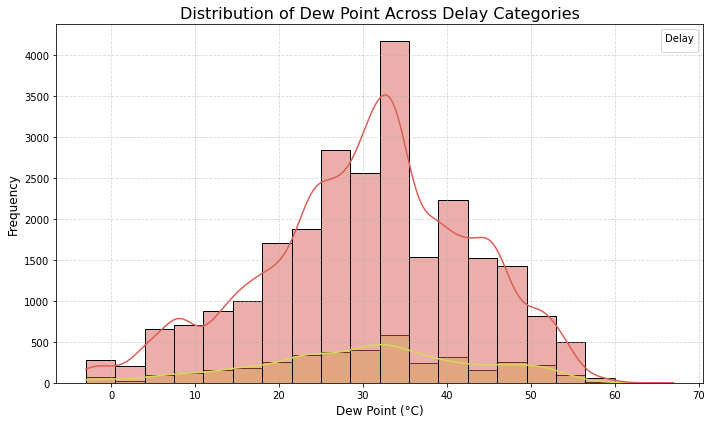

In [23]:
# Set a color palette for better visualization
colors = sns.color_palette('hls')

# Plot histograms/density plots
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Dew Point', hue='DELAY', kde=True, bins=20, palette=colors)
plt.title('Distribution of Dew Point Across Delay Categories', fontsize=16)
plt.xlabel('Dew Point (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Delay', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

#### Observation
- Dew point is the temperature at which air becomes saturated with water vapor, leading to condensation and potentially affecting flight conditions.
- Dew points in the range of 25 to 35 degrees Celsius are relatively high, indicating high humidity levels. High humidity can affect aircraft performance, particularly during takeoff and landing, and may also lead to reduced visibility.
- Reduced Aircraft Performance
- Reduced Lift
- Reduced Visibility
- Weather-Related Delays
- Increased Risk of Aircraft Icing:

#### Correlation

<Axes: >

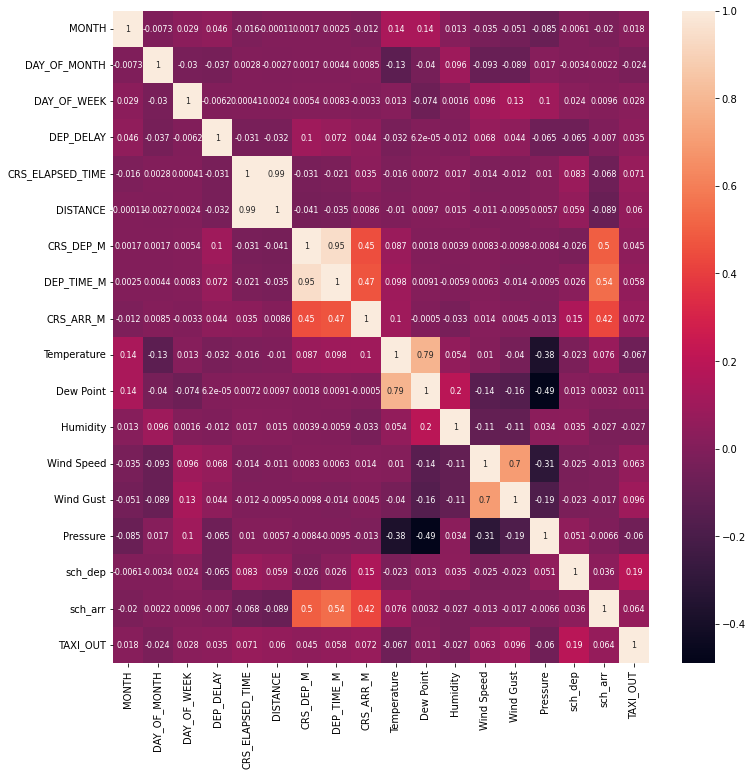

In [24]:
plt.figure(figsize=(12, 12))
sns.heatmap(data[numerical_features_new].corr(), annot=True, annot_kws={'size': 8})

### Relation between Condition and Delay

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_17000/3706406117.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotating x tick labels


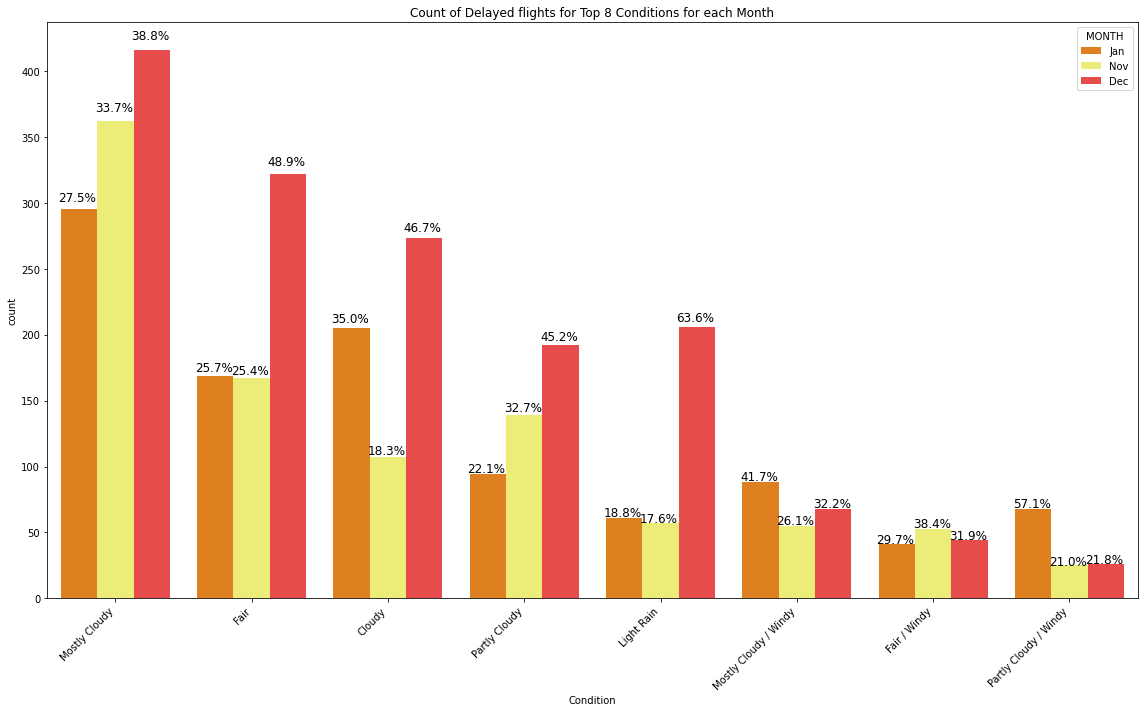

In [25]:
yellow = (255/255, 255/255, 102/255)  # RGB for yellow
orange = (255/255, 128/255, 0/255)  # RGB for orange
red = (255/255, 51/255, 51/255)   # RGB for red
# Create a custom color palette with shades of orange, yellow, and red
custom_palette = sns.color_palette([orange, yellow, red])
plt.figure(figsize=(16,10))
data_delay = data[data['DELAY']==1]
# Selecting the first 15 classes of Condition and sorting them in descending order by count
top_conditions = data_delay['Condition'].value_counts().head(8).index.tolist()

# Filtering the dataframe to include only the top 15 conditions
data_top_conditions = data_delay[data_delay['Condition'].isin(top_conditions)]

# Plotting the count plot
ax = sns.countplot(x='Condition', hue='MONTH', data=data_top_conditions, order=top_conditions,palette=custom_palette)
ax.set_title('Count of Delayed flights for Top 8 Conditions for each Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotating x tick labels
ax.legend(title='MONTH', labels=['Jan','Nov','Dec'])

with_hue(ax,data_delay['Condition'],8, 3)

plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_17000/336828273.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotating x tick labels


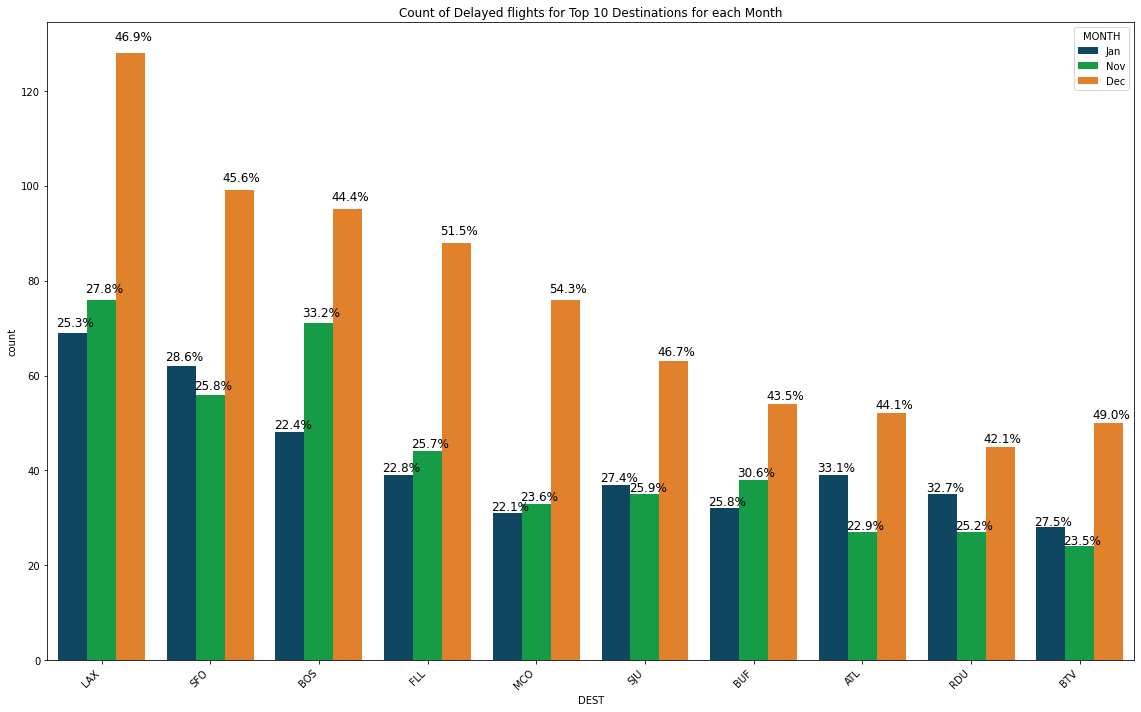

In [26]:
# Define hues in hexadecimal format
deep_blue = '#004c6d'
vibrant_green = '#00b140'
warm_orange = '#ff7f0e'

# Create a custom color palette with three hues
custom_palette = [deep_blue, vibrant_green, warm_orange]
plt.figure(figsize=(16,10))
data_delay = data[data['DELAY']==1]
# Selecting the first 15 classes of Condition and sorting them in descending order by count
top_destinations = data_delay['DEST'].value_counts().head(10).index.tolist()

# Filtering the dataframe to include only the top 15 conditions
data_top_destinations = data_delay[data_delay['DEST'].isin(top_destinations)]

# Plotting the count plot
ax = sns.countplot(x='DEST', hue='MONTH', data=data_top_destinations, order=top_destinations,palette=custom_palette)
ax.set_title('Count of Delayed flights for Top 10 Destinations for each Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotating x tick labels
ax.legend(title='MONTH', labels=['Jan','Nov','Dec'])

with_hue(ax,data_delay['DEST'],10, 3)

plt.tight_layout()
plt.show()

Flight delays from JFK Airport to destinations like LAX (Los Angeles), SFO (San Francisco), BOS (Boston)(Florida), FLL (Fort Lauderdale), and MCO (Orlando) during December can be influenced by various factors:

- Winter Weather: December in the Northeast United States often brings cold temperatures, snow, and ice, which can lead to flight delays and cancellations. These weather conditions can affect not only departures from JFK but also arrivals at the destination airports.
- Increased Holiday Travel: December is a peak travel period due to the holiday season, with many people flying to visit family and friends or for vacation. The increased passenger traffic can lead to congestion at airports, longer security lines, and delays in boarding and deplaning processes.
- Air Traffic Control Congestion: JFK Airport is one of the busiest airports in the United States, and airspace congestion can occur, especially during peak travel times like December. Air traffic control may implement flow control measures, such as spacing out departures and arrivals, which can lead to delays for flights to various destinations.
- Limited Runway Capacity: JFK Airport has a limited number of runways compared to its high volume of air traffic. During peak travel periods, including December, the demand for runway slots may exceed the available capacity, leading to delays in departures and arrivals.
- Crew and Aircraft Availability: Airlines may face challenges in crew scheduling and aircraft availability during the holiday season. Crew shortages, scheduling conflicts, and maintenance issues can contribute to flight delays as airlines work to address these issues and ensure safe and efficient operations.
- Weather Conditions at Destination: While winter weather can affect departures from JFK, it can also impact arrivals at destinations like LAX, SFO, BOS, FLL, and MCO. If these airports experience adverse weather conditions such as fog, snow, or low visibility, it can lead to delays in landing clearance and ground operations.

In [27]:
data_delay.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST',
       'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M',
       'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity', 'Wind',
       'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT', 'DELAY'],
      dtype='object')

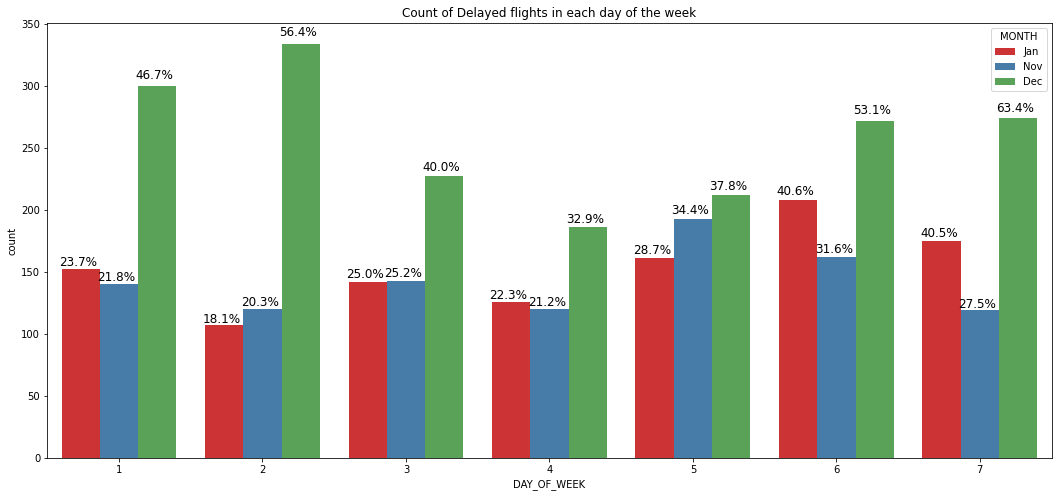

In [28]:
# ax = sns.countplot(x='MONTH',hue='DELAY',data=data)
# Define hexadecimal color codes for purple and maroon
plt.figure(figsize=(18,8))
# teal_color = '#008080'
# coral_color = '#FF7F50'
palette = sns.cubehelix_palette(n_colors=6, start=0, rot=0.4, dark=0.3, light=0.8)
ax = sns.countplot(x='DAY_OF_WEEK', hue='MONTH', data=data_delay,palette='Set1',alpha=1)
ax.set_title('Count of Delayed flights in each day of the week')
ax.legend(title='MONTH', labels=['Jan','Nov','Dec'])
with_hue(ax,data_delay.DAY_OF_WEEK,7,3)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_17000/3926419905.py:6: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=data, x='DISTANCE',hue='DELAY' ,kde=True, bins=20, palette=colors)


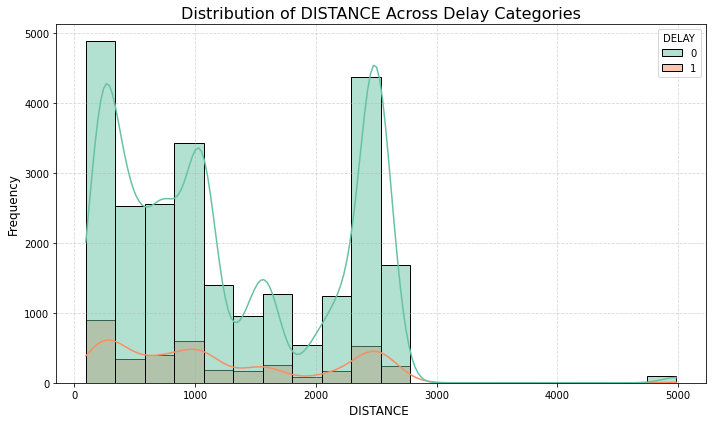

In [29]:
# Set a color palette for better visualization
colors = sns.color_palette('Set2')

# Plot histograms/density plots
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='DISTANCE',hue='DELAY' ,kde=True, bins=20, palette=colors)
plt.title('Distribution of DISTANCE Across Delay Categories', fontsize=16)
plt.xlabel('DISTANCE ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# plt.legend(title='Delay', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

Here's a general guideline:

- Short-Duration Flights: These typically cover shorter distances and have flight times of a few hours or less. Short-haul flights, such as domestic flights or flights between neighboring countries, are often considered short-duration flights. They usually involve distances of up to around 1,500 kilometers (approximately 930 miles).
- Medium-Duration Flights: These flights cover moderate distances and have flight times ranging from a few hours to around half a day. They often include regional flights or flights between continents within the same hemisphere. Medium-haul flights typically cover distances between 1,500 and 5,000 kilometers (approximately 930 to 3,100 miles).
- Long-Duration Flights: These flights cover long distances and have flight times of several hours or more, sometimes spanning entire continents or crossing oceans. Long-haul flights often involve intercontinental travel. They typically cover distances exceeding 5,000 kilometers (approximately 3,100 miles).

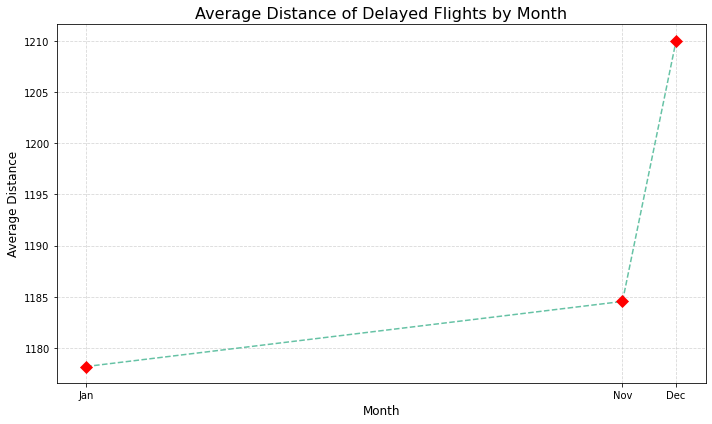

In [30]:
# Calculate the average distance for each month
avg_distance_by_month = data_delay.groupby('MONTH')['DISTANCE'].mean()

# Set a color palette for better visualization
colors = sns.color_palette('Set2')

# Define month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Plot line chart
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=avg_distance_by_month, marker='o', color=colors[0])

# Highlight December
dec_index = avg_distance_by_month.index.get_loc(12)
dec_point = avg_distance_by_month.iloc[dec_index]
lineplot.lines[0].set_linestyle("--")
lineplot.lines[0].set_marker("D")
lineplot.lines[0].set_markersize(8)
lineplot.lines[0].set_markerfacecolor('red')
lineplot.lines[0].set_markeredgecolor('red')

# Add labels and title
plt.title('Average Distance of Delayed Flights by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Distance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.xticks(avg_distance_by_month.index, [month_names[x] for x in avg_distance_by_month.index], rotation=0)  # Customize x-axis ticks
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [31]:
data_delay.OP_UNIQUE_CARRIER.value_counts()

OP_UNIQUE_CARRIER
B6    1600
DL     914
9E     496
AA     405
MQ     169
AS     144
YX      86
OO      52
HA       7
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_17000/3651906842.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='OP_UNIQUE_CARRIER', data=data_delay,palette='rainbow',alpha=1)


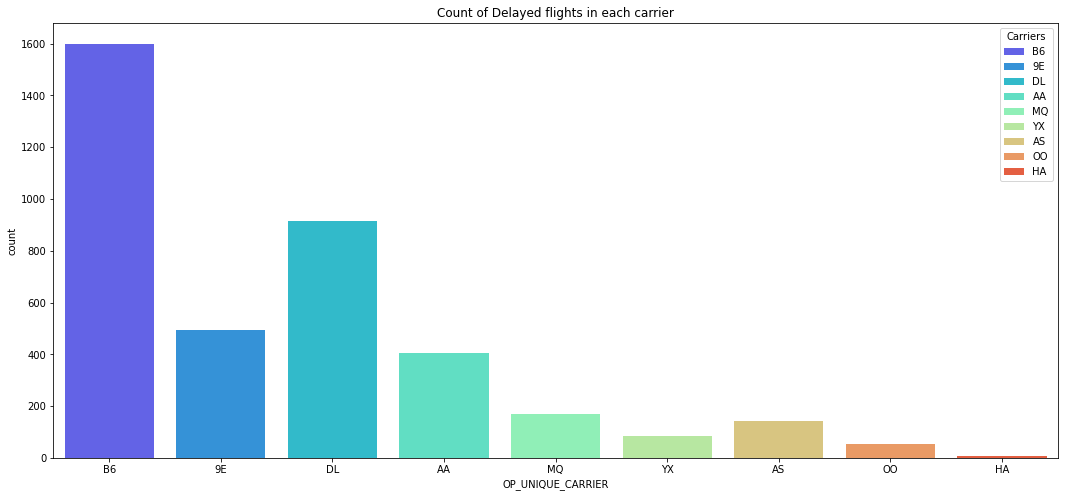

In [32]:
# ax = sns.countplot(x='MONTH',hue='DELAY',data=data)
# Define hexadecimal color codes for purple and maroon
plt.figure(figsize=(18,8))
# teal_color = '#008080'
# coral_color = '#FF7F50'
palette = sns.cubehelix_palette(n_colors=6, start=0, rot=0.4, dark=0.3, light=0.8)
ax = sns.countplot(x='OP_UNIQUE_CARRIER', data=data_delay,palette='rainbow',alpha=1)
ax.set_title('Count of Delayed flights in each carrier')
ax.legend(title='Carriers', labels=data_delay.OP_UNIQUE_CARRIER.unique())
#with_hue(ax,data_delay.DAY_OF_WEEK,7,3)
plt.show()

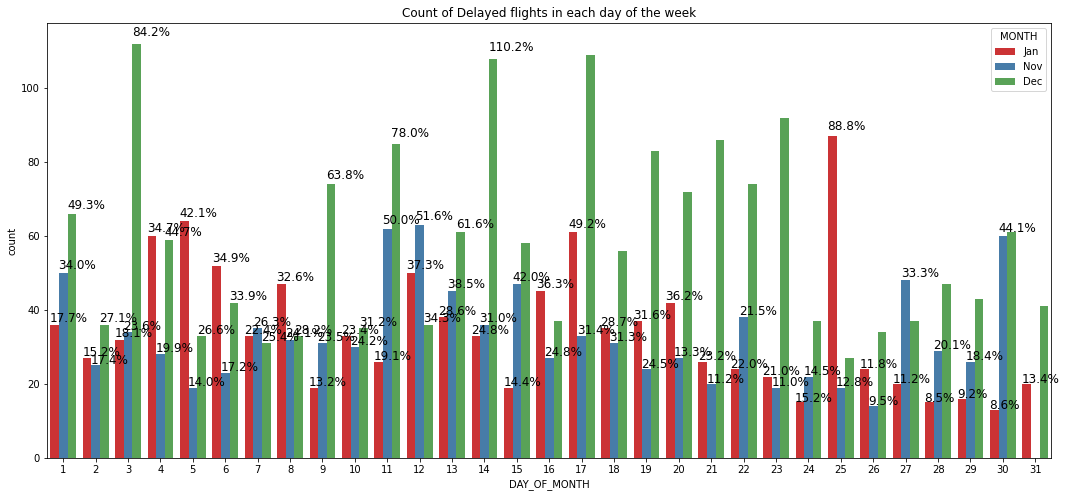

In [33]:
# ax = sns.countplot(x='MONTH',hue='DELAY',data=data)
# Define hexadecimal color codes for purple and maroon
plt.figure(figsize=(18,8))
# teal_color = '#008080'
# coral_color = '#FF7F50'
palette = sns.cubehelix_palette(n_colors=6, start=0, rot=0.4, dark=0.3, light=0.8)
ax = sns.countplot(x='DAY_OF_MONTH', hue='MONTH', data=data_delay,palette='Set1',alpha=1)
ax.set_title('Count of Delayed flights in each day of the week')
ax.legend(title='MONTH', labels=['Jan','Nov','Dec'])
with_hue(ax,data_delay.DAY_OF_MONTH,25,3)
plt.show()

#### Modelling

In [33]:
data.drop(['CRS_ELAPSED_TIME','CRS_DEP_M','DEP_DELAY'],inplace=True, axis=1)

In [34]:
data.shape

(28818, 20)

In [35]:
data.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST',
       'DISTANCE', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point',
       'Humidity', 'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition',
       'sch_dep', 'sch_arr', 'TAXI_OUT', 'DELAY'],
      dtype='object')

### Label Encoding Categorical Features

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features_new:
    data[feature] = label_encoder.fit_transform(data[feature])

### Data Preparation for model building

In [37]:
# Separating the target feature and independent features
X = data.drop('DELAY',axis=1)
y = data['DELAY']

In [38]:
X.shape

(28818, 19)

In [39]:
y.shape

(28818,)

### Function to calculate the metrics

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def model_performance_classification(model, predictors, target, flag=True):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)
    # Calculate confusion matrix
    cm = confusion_matrix(target, pred)

    accuracy = accuracy_score(target, pred)  # to compute accuracy
    precision = precision_score(target, pred)  # to compute precision
    recall = recall_score(target, pred)  # to compute recall
    f1 = f1_score(target, pred)  # to compute F1 score
    
    # creating a dataframe of metrics
    metrics = {
            "Accuracy": accuracy,
            " Precision ": precision,
            "Recall": recall,
            "F1 score": f1,
        }
    # creating a DataFrame from the dictionary
    df_perf = pd.DataFrame(metrics, index=[0])
    
    if flag:
        print("Plotting confusion matrix")
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Set3', cbar=False, annot_kws={"size": 14})
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')

        plt.tight_layout()
        plt.show()


    return df_perf

#### Applying SMOTE ENN

In [41]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

In [42]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9524)

In [43]:
# Initializing SMOTEENN
smote_enn = SMOTEENN(random_state=9524)

In [44]:
# Resampling the training data
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

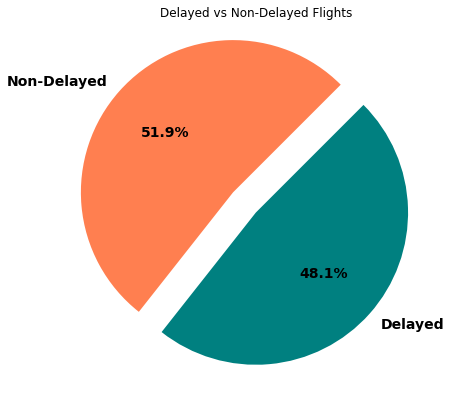

In [46]:
# Data for the pie chart
#Proportion of 0 and 1 in target column
plt.figure(figsize=(7,7))
y_counts = y_train_resampled.value_counts()
labels = ["Non-Delayed", "Delayed"]
sizes = y_counts.values
colors = ["coral","#008080"]
#colors = ['#ff00ff', '#ffcc00', '#00ff00', '#00ffff']
# plt.pie(sizes,labels=labels,colors=colors,explode=(0.2,0),autopct='%1.1f%%');
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=45,
        textprops={'fontsize': 14, 'fontweight': 'bold'},explode=(0.2,0)) 
plt.title('Delayed vs Non-Delayed Flights');

In [45]:
X_test.shape

(5764, 19)

In [46]:
y_train_resampled.value_counts()

DELAY
1    19587
0    18173
Name: count, dtype: int64

#### Scaling the data

In [47]:
from sklearn.preprocessing import StandardScaler
#Scaling the data
scaler = StandardScaler()
X_train_resampled[X_train_resampled.columns] = scaler.fit_transform(X_train_resampled[X_train_resampled.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

#### Logistic Regression on data without smote

In [48]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Plotting confusion matrix


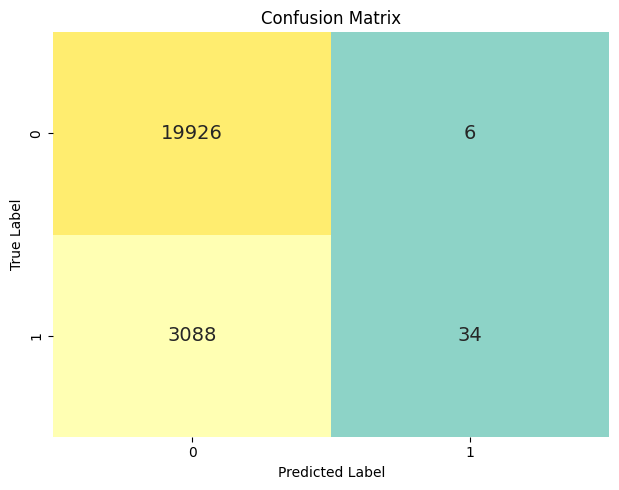

Training Performance(No SMOTE):
    Accuracy   Precision    Recall  F1 score
0  0.865793         0.85  0.01089  0.021505


In [49]:
Logistic_train_perf_nosmote = model_performance_classification(logistic_regression_model, X_train, y_train)
print("Training Performance(No SMOTE):\n",Logistic_train_perf_nosmote)

Plotting confusion matrix


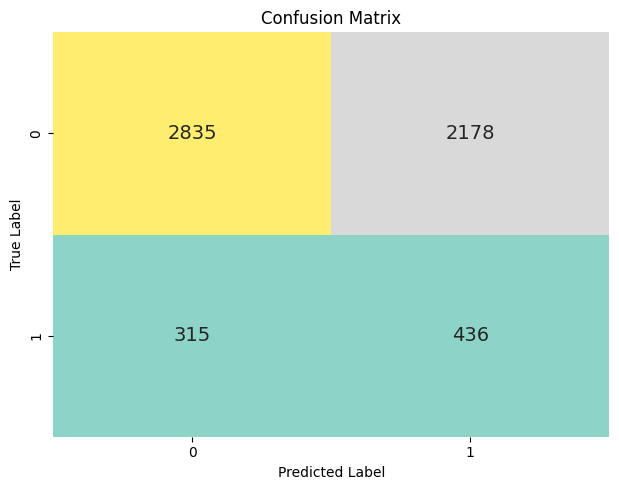

Testing Performance(No SMOTE):
    Accuracy   Precision     Recall  F1 score
0  0.567488     0.166794  0.580559  0.259138


In [50]:
Logistic_test_perf_nosmote = model_performance_classification(logistic_regression_model, X_test, y_test)
print("Testing Performance(No SMOTE):\n",Logistic_test_perf_nosmote)

### Logistic Regression with SMOTE

In [51]:
# Initialize the logistic regression model
logistic_regression_model_smote = LogisticRegression(max_iter=1000)

logistic_regression_model_smote.fit(X_train_resampled,y_train_resampled)

LogisticRegression(max_iter=1000)

Plotting confusion matrix


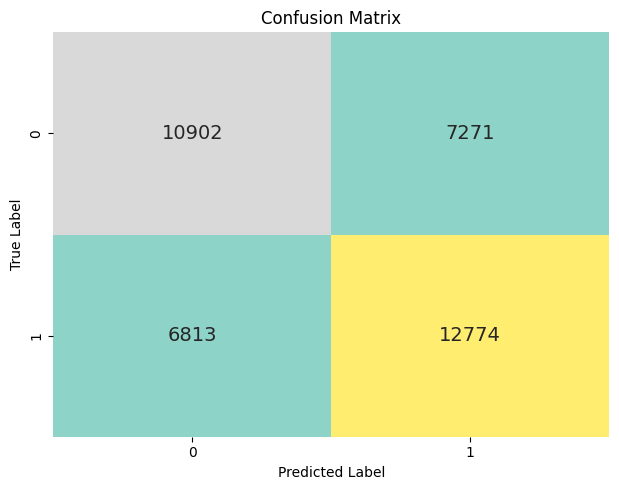

Training Performance:
    Accuracy   Precision     Recall  F1 score
0  0.627013     0.637266  0.652167  0.644631


In [52]:
# Fit the model on the training data
Logistic_train_perf_withsmote = model_performance_classification(logistic_regression_model_smote, 
                                                                 X_train_resampled, y_train_resampled)
print("Training Performance:\n",Logistic_train_perf_withsmote)

Plotting confusion matrix


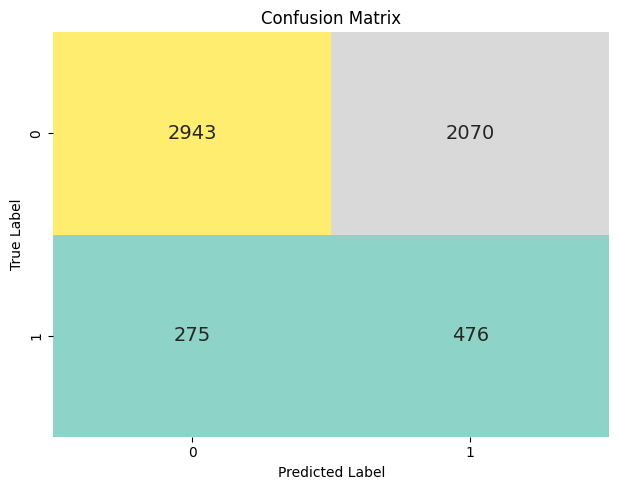

Testing Performance:
    Accuracy   Precision     Recall  F1 score
0  0.593164      0.18696  0.633822  0.288747


In [53]:
Logistic_test_perf_withsmote = model_performance_classification(logistic_regression_model_smote, X_test, y_test)
print("Testing Performance:\n",Logistic_test_perf_withsmote)

In [54]:
# Comparing SMOTE AND without SMOTE results
# training performance comparison

models_comp_df = pd.concat(
    [Logistic_train_perf_nosmote.T, Logistic_train_perf_withsmote.T, Logistic_test_perf_nosmote.T,Logistic_test_perf_withsmote.T],
    axis=1,
)

models_comp_df.columns = [
    "Logistic train(No Smote)",
    "Logistic train(With Smote)",
    "Logistic test(No Smote)",
    "Logistic test(With Smote)",
]

print("Logistic Regression performance comparison with & w/o SMOTE:")
models_comp_df

Logistic Regression performance comparison with & w/o SMOTE:


,Logistic train(No Smote),Logistic train(With Smote),Logistic test(No Smote),Logistic test(With Smote)
Accuracy,0.865793,0.627013,0.567488,0.593164
Precision,0.850000,0.637266,0.166794,0.186960
Recall,0.010890,0.652167,0.580559,0.633822
F1 score,0.021505,0.644631,0.259138,0.288747


### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier()

# Fit the model on the training data
random_forest_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

Plotting confusion matrix


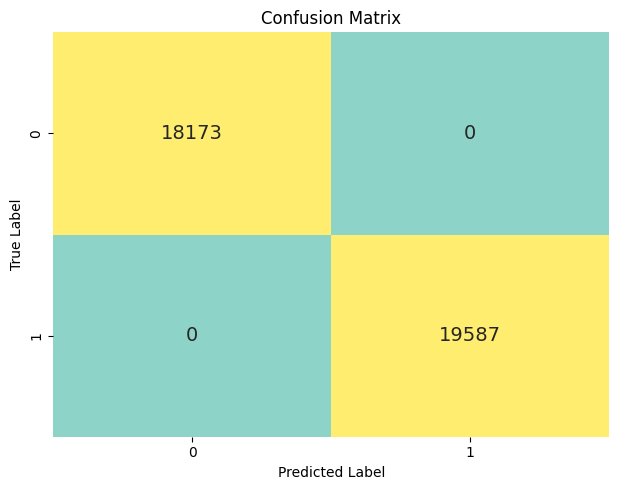

Training Performance:
    Accuracy   Precision   Recall  F1 score
0       1.0          1.0     1.0       1.0


In [56]:
# Fit the model on the training data
Random_Forest_train_perf = model_performance_classification(random_forest_model, 
                                                                 X_train_resampled, y_train_resampled)
print("Training Performance:\n",Random_Forest_train_perf)

Plotting confusion matrix


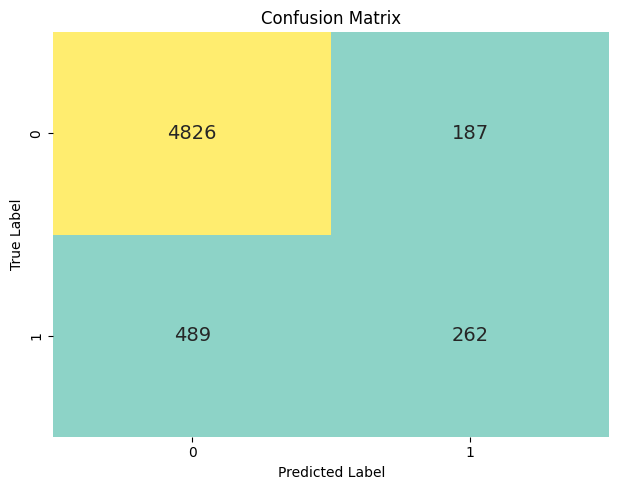

Testing Performance:
    Accuracy   Precision     Recall  F1 score
0   0.88272     0.583519  0.348868  0.436667


In [57]:
# Fit the model on the test data
Random_Forest_test_perf = model_performance_classification(random_forest_model, 
                                                                 X_test, y_test)
print("Testing Performance:\n",Random_Forest_test_perf)

### Hyperparameter Tuning in Random Forest

In [58]:
#Importing 'GridSearchCV' from sklearn
from sklearn.model_selection import GridSearchCV

random_forest_tuned = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_obj = GridSearchCV(estimator=random_forest_tuned, param_grid=param_grid, cv=5, n_jobs=-1)
grid_obj=grid_obj.fit(X_train_resampled, y_train_resampled)

best_params = grid_obj.best_params_
random_forest_tuned = grid_obj.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


Plotting confusion matrix


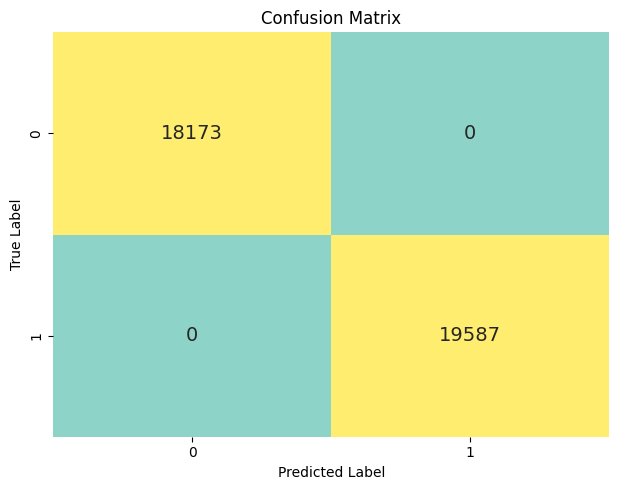

In [59]:
rf_tuned_train_perf = model_performance_classification(random_forest_tuned, 
                                                                 X_train_resampled,y_train_resampled)

Plotting confusion matrix


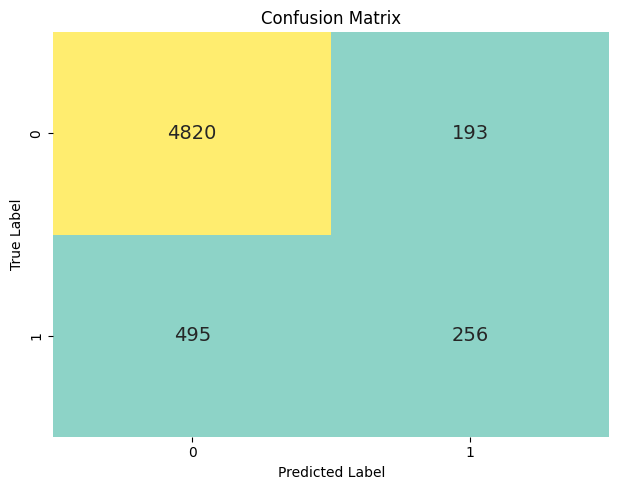

In [60]:
rf_tuned_test_perf = model_performance_classification(random_forest_tuned, 
                                                                 X_test, y_test)

### Feature Importance in tuned Random Forest

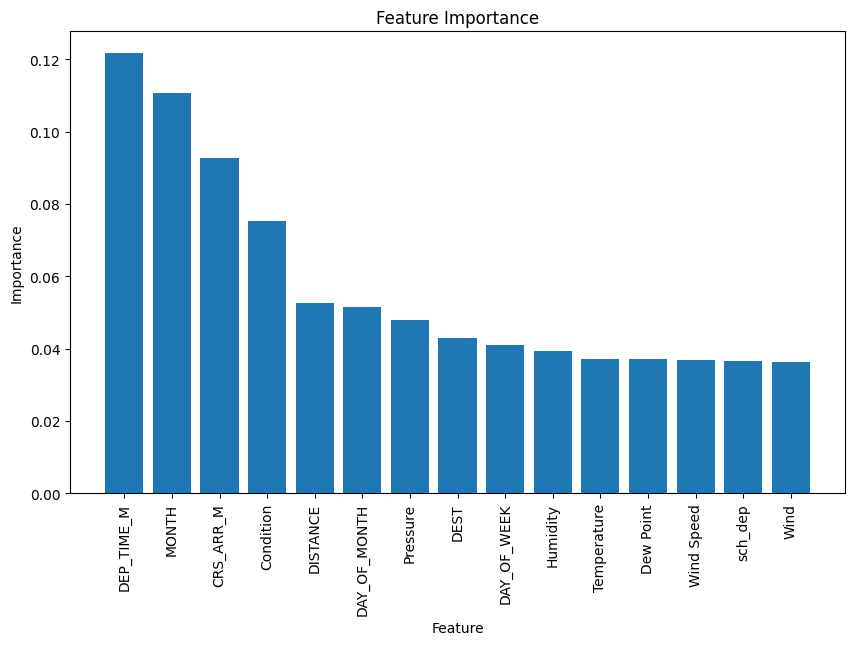

In [61]:
# Get feature importances
feature_importances = random_forest_tuned.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1][:15]
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15),feature_importances[sorted_indices], align='center')
plt.xticks(range(15), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### XgBoost

In [62]:
from xgboost import XGBClassifier
# Initializing the XGBoost classifier
xg_boost_model = XGBClassifier()

# Training the classifier
xg_boost_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Plotting confusion matrix


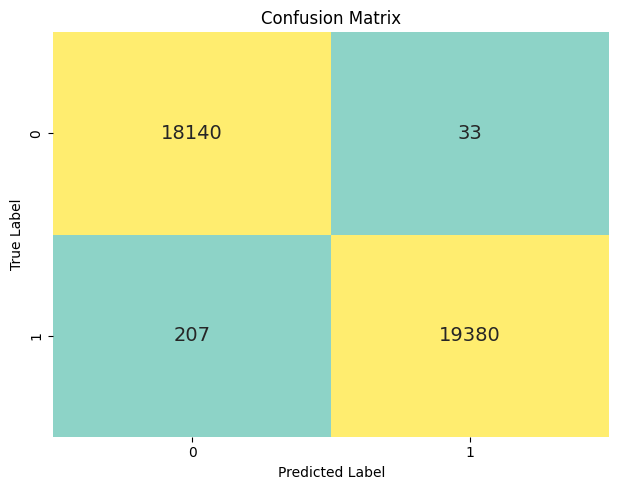

Training Performance:
    Accuracy   Precision     Recall  F1 score
0  0.993644       0.9983  0.989432  0.993846


In [63]:
# Fit the model on the training data
XgBoost_train_perf = model_performance_classification(xg_boost_model, 
                                                                 X_train_resampled, y_train_resampled)
print("Training Performance:\n",XgBoost_train_perf)

Plotting confusion matrix


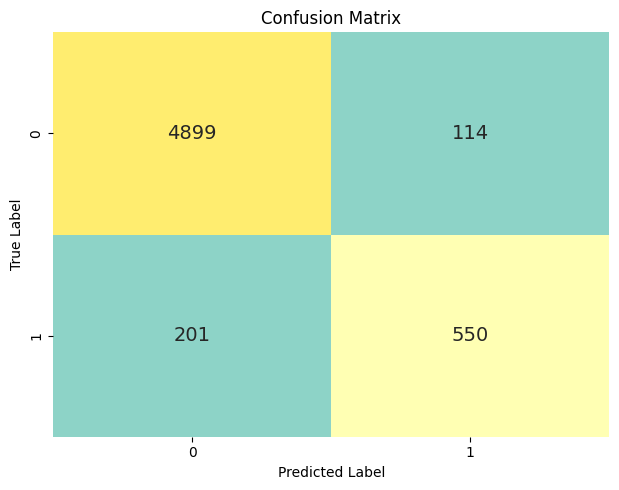

Training Performance:
    Accuracy   Precision     Recall  F1 score
0   0.94535     0.828313  0.732357  0.777385


In [64]:
# Fit the model on the test data
XgBoost_test_perf = model_performance_classification(xg_boost_model, 
                                                                 X_test, y_test)
print("Training Performance:\n",XgBoost_test_perf)

### Hyperparameter Tuning in XgBoost

In [65]:
xgb_tuned = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
}

grid_obj = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid, cv=5, n_jobs=-1)
grid_obj=grid_obj.fit(X_train_resampled, y_train_resampled)

best_params = grid_obj.best_params_
xgb_tuned = grid_obj.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 1.0}


Plotting confusion matrix


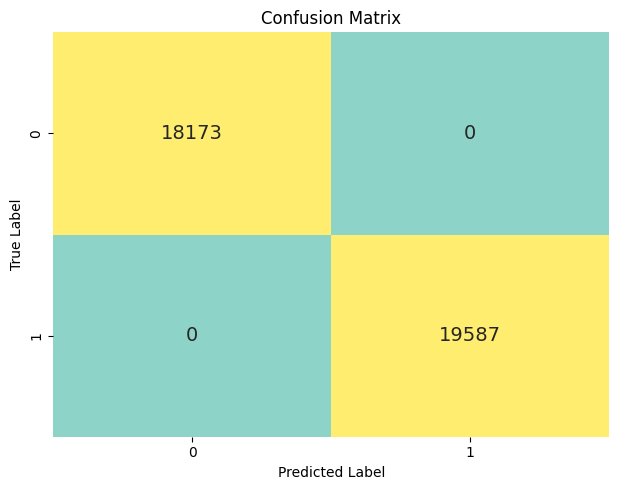

In [66]:
xgb_tuned_train_perf = model_performance_classification(xgb_tuned, 
                                                                 X_train_resampled,y_train_resampled)

Plotting confusion matrix


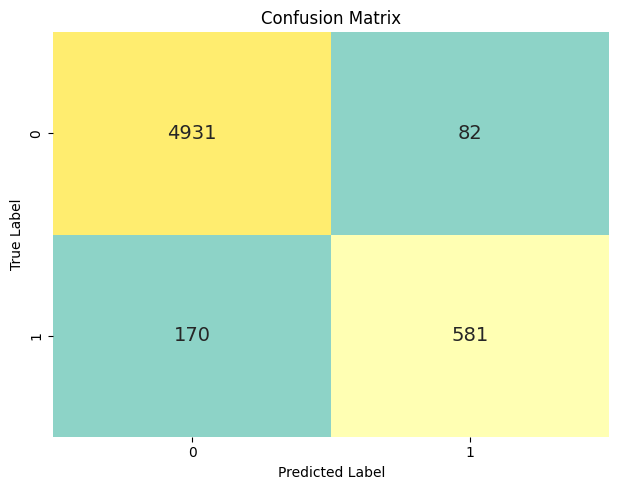

In [67]:
xgb_tuned_test_perf = model_performance_classification(xgb_tuned, 
                                                                 X_test,y_test)

#### Shap values of tuned XgBoost

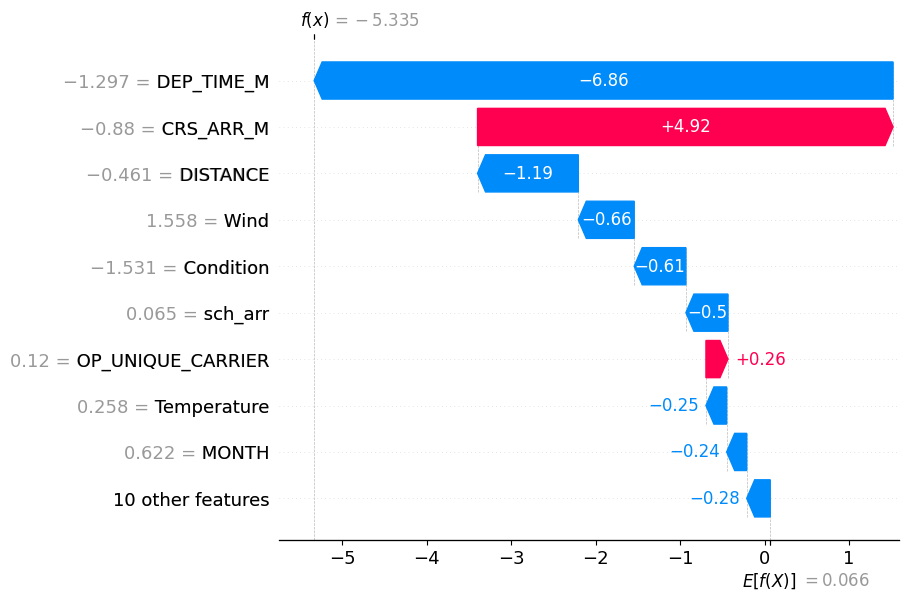

In [68]:
import shap
# Create a SHAP explainer object
explainer = shap.Explainer(xgb_tuned)

# Calculate SHAP values for all features on the training data
shap_values = explainer.shap_values(X_train_resampled)

# Choose the instance you want to visualize (e.g., the first instance)
instance_index = 0

# Create an Explanation object for the chosen instance
shap_explanation = shap.Explanation(
    values=shap_values[instance_index],
    base_values=explainer.expected_value,
    data=X_train_resampled.iloc[instance_index, :]
)

# Generate a waterfall plot for the chosen instance
shap.waterfall_plot(shap_explanation)

# Show the plot
plt.show()

In [69]:
# training performance comparison

train_models_comp_df = pd.concat(
    [Logistic_train_perf_withsmote.T,Random_Forest_train_perf.T,rf_tuned_train_perf.T,
     XgBoost_train_perf.T,xgb_tuned_train_perf.T],
    axis=1,
)

train_models_comp_df.columns = [
    "Logistic (With Smote)",
    "Random Forest",
    "Random Forest tuned",
    "XgBoost",
    "XgBoost Tuned",
]

print("Model Comparison on training set:")
train_models_comp_df

Model Comparison on training set:


,Logistic (With Smote),Random Forest,Random Forest tuned,XgBoost,XgBoost Tuned
Accuracy,0.627013,1.0,1.0,0.993644,1.0
Precision,0.637266,1.0,1.0,0.998300,1.0
Recall,0.652167,1.0,1.0,0.989432,1.0
F1 score,0.644631,1.0,1.0,0.993846,1.0


In [70]:
# training performance comparison

test_models_comp_df = pd.concat(
    [Logistic_test_perf_withsmote.T,Random_Forest_test_perf.T,rf_tuned_test_perf.T,
     XgBoost_test_perf.T,xgb_tuned_test_perf.T],
    axis=1,
)

test_models_comp_df.columns = [
    "Logistic (With Smote)",
    "Random Forest",
    "Random Forest tuned",
    "XgBoost",
    "XgBoost Tuned",
]

print("Model Comparison on test set:")
test_models_comp_df

Model Comparison on test set:


,Logistic (With Smote),Random Forest,Random Forest tuned,XgBoost,XgBoost Tuned
Accuracy,0.593164,0.882720,0.880638,0.945350,0.956280
Precision,0.186960,0.583519,0.570156,0.828313,0.876320
Recall,0.633822,0.348868,0.340879,0.732357,0.773635
F1 score,0.288747,0.436667,0.426667,0.777385,0.821782


### AUC-ROC Curve of all basic models 

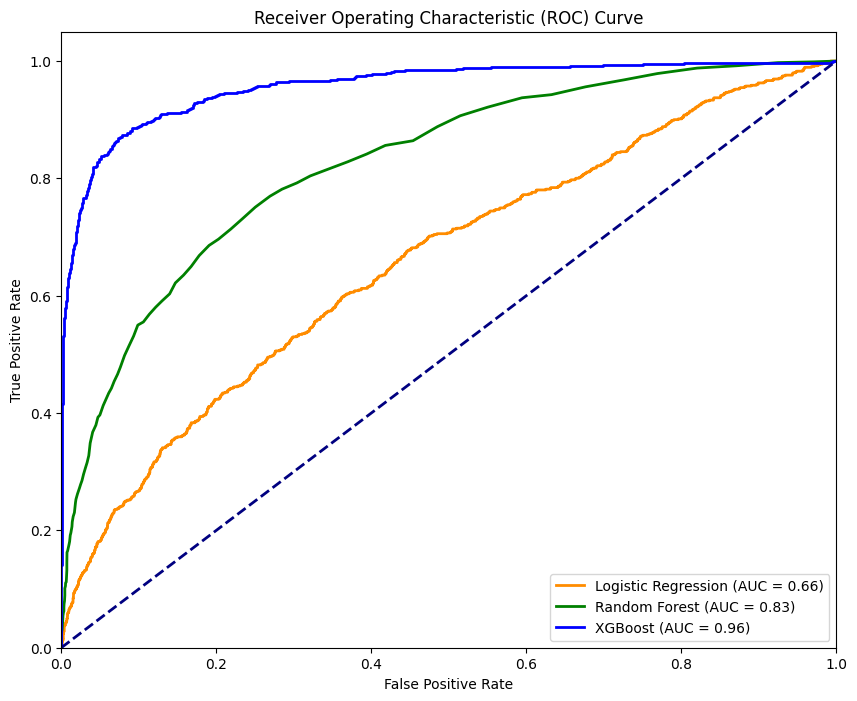

In [71]:
from sklearn.metrics import roc_curve, auc

# Assuming you have models named logistic_model, random_forest_model, xgboost_model, adaboost_model, gradient_boost_model


# Predict probabilities
logistic_probs = logistic_regression_model_smote.predict_proba(X_test)[:, 1]
random_forest_probs = random_forest_model.predict_proba(X_test)[:, 1]
xgboost_probs = xg_boost_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_probs)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, random_forest_probs)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, xgboost_probs)
roc_auc_xgboost = auc(fpr_xgboost, tpr_xgboost)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_random_forest, tpr_random_forest, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_random_forest)
plt.plot(fpr_xgboost, tpr_xgboost, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgboost)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### AUC-ROC curve of all tuned models

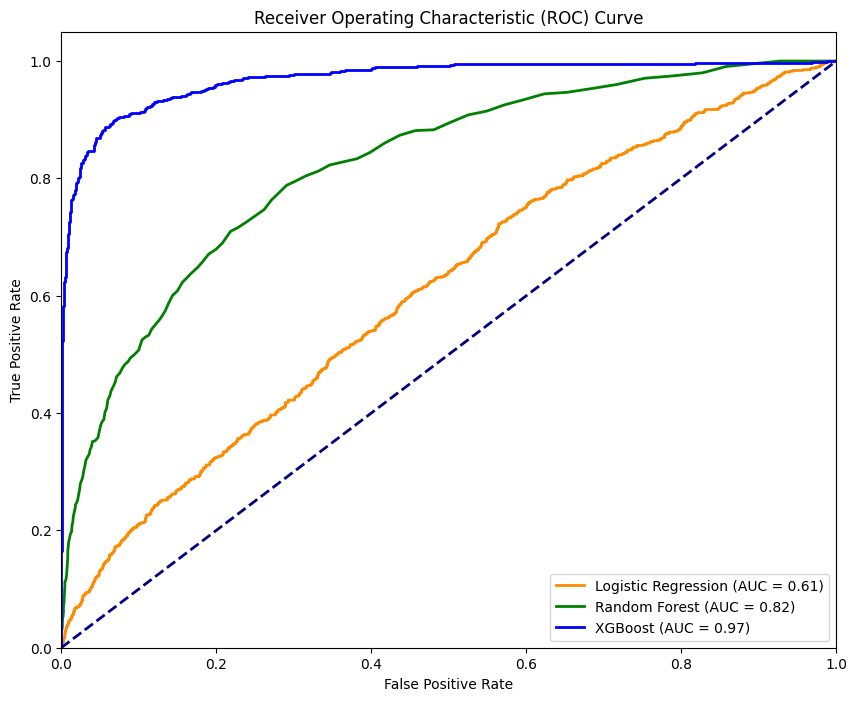

In [72]:
from sklearn.metrics import roc_curve, auc

logistic_probs = logistic_regression_model.predict_proba(X_test)[:, 1]
random_forest_probs = random_forest_tuned.predict_proba(X_test)[:, 1]
xgboost_probs = xgb_tuned.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_probs)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, random_forest_probs)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, xgboost_probs)
roc_auc_xgboost = auc(fpr_xgboost, tpr_xgboost)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_random_forest, tpr_random_forest, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_random_forest)
plt.plot(fpr_xgboost, tpr_xgboost, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgboost)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()